In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
#plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (12, 6)

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))
os.getcwd()

'/Users/Jonathan/citiBike_NYC'

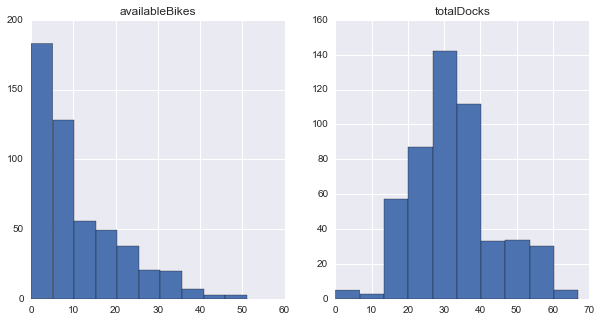

In [2]:
import ujson
from pandas.io.json import json_normalize

filename = 'API_Data/2016-01-13 05:51:26 PM'

with open(filename,'r') as f:
    data = f.read()

r = ujson.loads(data)
time = r['executionTime']
data = r['stationBeanList']
len(data) # 508 docks
r['stationBeanList'][0] # First key/station

df = json_normalize(r['stationBeanList']) # convert to DF

f,(ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df['availableBikes'])
ax1.set_title('availableBikes')
ax2.hist(df['totalDocks'])
ax2.set_title('totalDocks')

In [3]:
filename_out = 'to_CartoDB_6pm.csv'
df.to_csv(filename_out)

In [4]:
df.shape
df.columns
df.statusValue.unique()  # array([u'In Service', u'Not In Service'], dtype=object)
len(df[df.statusValue=='Not In Service']) / float(len(df[df.statusValue=='In Service']))

0.01195219123505976

In [5]:
print df.availableBikes.sum()
print df.availableDocks.sum()

5654
10507
